# Mini Project I

A mini-project is where you will begin to develop code and analysis to explore a data set and address questions. The format differs from a weekly lab in that you will develop your own notebook below.  **There will be no automatic test of your answers.** As a budding data scientist you need to develop the habit of checking your own work.

You will create all the notebook code and **use extensive markdown to document** the process and your observations. This can be challenging at first but it is the way to trully understand the code development process and build confidence using code to analysis data.


# Olympics Data mini-project
## Overview
In celebration of the Olympic spirit we will analyze trends in a data set which spans the from the 1896 Athens games to Rio in 2016. With this data we will explore trends in medals awarded, sports, and countries, as well as any host country advantage. The dataset is from Kaggle (https://www.kaggle.com ), a data science dataset, coding, and competition site. The mini-project represents your first chance to try out your coding and data skills to address specific questions without template code. Look to your previous labs and our work in class for ideas.

(Data source:
[Kaggle dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results))

Background Resources:
- Data Tables (Inferential Thinking 6.1-6.4) 
- Visualization (Inferential Thinking 7.1, 7.2)
- Cross-classifying (Inferential Thinking 8.3)

### Initialization

In [ ]:
# Enter your name as a string
name = ...

In [ ]:
# Extra Python functionality to import
from datascience import *  # datascience Table 
import EDS
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
user = os.getenv('JUPYTERHUB_USER')

### Data Set
Athletes: Olympic_Data/athlete_events.csv
Source: Kaggle https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
#### Data Fields
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex-MorF
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or nan

We will limit our project to data from the Winter Olympics by using the where method [.where("Season","Winter") ] which leaves us with 18,923 individual athletes and 48,564 athlete/event datapoints (Many athletes compete in multiple events and/or over multiple Olympics).  

In [207]:
datafile = "Olympic_Data/winter_athletes.csv"
athletes = Table.read_table(datafile).sort("Year",descending=True).where("Season","Winter")
athletes

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,Juhamatti Tapio Aaltonen,M,28,184,85,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
126,Forough Abbasi,F,20,164,58,Iran,IRI,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Men's Singles,nan
145,Jeremy Abbott,M,28,175,70,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Super G,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Giant Slalom,nan
463,Agnese boltia,F,17,166,60,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Giant Slalom,nan
532,Iason Abramashvili,M,25,176,82,Georgia,GEO,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Slalom,nan
534,Oleksandr Volodymyrovych Abramenko,M,25,180,82,Ukraine,UKR,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Men's Aerials,nan


#### Considerations
- Each observation is an athletes performance in a particular event for a particular year.
- `.group()` is a very useful Table method to group by Team, Year, Age, etc.
- Athletes can perform in multiple events and over multiple years
- `athletes.group("Name", np.unique)` Can provide unique athlete names and combine their efforts in a list. This can be a challenge for analysis of specific performances but givene a good count of total athletes, `athletes.group("Name", np.unique).num_rows`

In [268]:
athletes.group("Name", np.unique).num_rows

18923

In [269]:
athletes.num_rows

48564

Some athletes do not have an age listed do for analysis of age we will only use those with a reported and reasonable age.

In [ ]:
age_athletes = athletes.where("Age",are.below(99)).where("Age",are.above(0))

## Mini-Project Questions to address
Now develop your project to address the questions below. You will be adding lines of code and markdown as needed below. Feel free to expand the project to explore ideas of interest.

1. What is the earliest year for a Winter Olympics in this dataset? Check this value [(https://olympics.com/en/olympic-games/olympic-results )](https://olympics.com/en/olympic-games/olympic-results ), does it fit the data?


2. Examine the distribution of the age of all Olympians with a histogram. What do you find? 

3. Another way to get a view of this distribution of Olympian ages is a **five number summary** which includes the min, max, median, mean, and standard deviation. To get the **five number summary** (min, max, median, mean, and standard deviation) using np.min, np.max, np.median, np.mean, and np.std respectively on the corresponding column array. Below create a function to compute and display the five number summary given an argument of table name and column label.
   | Statistic| Description||
   |---|---|---|
   |**Measures of the central tendency of data**|
   |mean|sum of values divided by number of values, $\bar{x}$ | `np.array([1, 3, 6, 7, 8]).mean()` <br> $\bar{x}=$ 5|
   |median|middle value of set of data | median of `np.array([1, 3, 6, 7, 8])`  is 6|
   |**Measures of variability of data**|
   |variance| average difference <br>between data and the mean, $\sigma^2$|$\sigma^2 = \frac{\sum_i(x_i - \bar{x})^2}{n-1} $ <br>for population where $n$ is number of data points|
   |standard deviation|square root of variance|$\sigma$|

In [233]:
def five_num_sum(table,column):
    nums=[]
    array = table.column(column)
    nums.append(np.min(array))
    nums.append(np.max(array))
    nums.append(np.mean(array))
    nums.append(np.median(array))
    nums.append(np.std(array))
    print(f'min: {nums[0]:.2f} max: {nums[1]:.2f}  mean: {nums[2]:.2f} median: {nums[3]:.2f} standard deviation: {nums[4]:.2f}')
    return nums

In [229]:
def two_num_sum(table,column):
    nums=[]
    array = table.column(column)
    nums.append(np.mean(array))
    nums.append(np.std(array))
    print(f'mean: {nums[0]:.2f} \nstandard deviation: {nums[1]:.2f} \n')
    return nums

In [227]:
two_num_sum(athletes,"Age")

mean: nan 
standard deviation: nan 



[nan, nan]

In [230]:
stats = two_num_sum(athletes.where("Age",are.below(90)),"Age")
stats

mean: 25.04 
standard deviation: 4.78 



[25.039147455415399, 4.7776857171359515]

In [231]:
stats = two_num_sum(athletes.where("Age",are.below(90)).where("Medal","Gold"),"Age")
stats

mean: 26.16 
standard deviation: 4.89 



[26.157037815126049, 4.8877121315522416]

In [292]:
stats = five_num_sum(athletes.where("Age",are.below(90)).where("Medal","Gold"),"Age")

min: 13.00 max: 57.00  mean: 26.16 median: 26.00 standard deviation: 4.89


In [296]:
stats = five_num_sum(athletes.where("Age",are.below(90)),"Age")

min: 11.00 max: 58.00  mean: 25.04 median: 24.00 standard deviation: 4.78


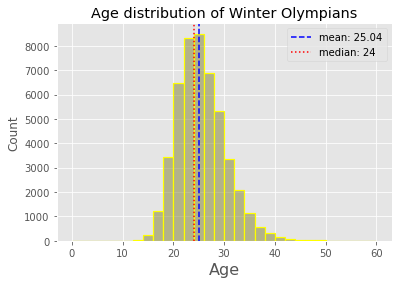

In [309]:
athletes.where("Age",are.below(90)).hist("Age", bins=30, range=[0,60], fc=(.5, .5, .2, 0.5), edgecolor='yellow', linewidth=1.2, density=False)
mean_label = 'mean: '+str(round(stats[2],2))
plt.axvline(x=stats[2], color='b', ls='--',label=mean_label)
median_label = 'median: '+str(int(stats[3]))
plt.axvline(x=stats[3], color='r', ls=':', label=median_label)
plt.title("Age distribution of Winter Olympians")
plt.legend()
plt.savefig('Olympian_Age_distro.png')
plt.show()

In [235]:
stats = five_num_sum(athletes.where("Age",are.below(90)).where("Medal","Gold").where("Team","France"),"Age")

min: 18.00 max: 31.00  mean: 24.47 median: 24.00 standard deviation: 3.23


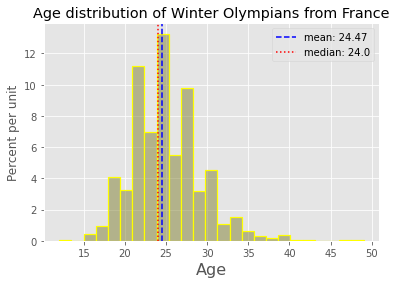

In [236]:
athletes.where("Age",are.below(90)).where("Team","France").hist("Age", \
        bins=25, fc=(.5, .5, .2, 0.5), edgecolor='yellow', linewidth=1.2)
mean_label = 'mean: '+str(round(stats[2],2))
plt.axvline(x=stats[2], color='b', ls='--',label=mean_label)
median_label = 'median: '+str(round(stats[3],2))
plt.axvline(x=stats[3], color='r', ls=':', label=median_label)
plt.title("Age distribution of Winter Olympians from France")
plt.legend()
plt.show()

In [174]:
stats[4]

4.7800000000000002

In [135]:
two_num_sum(athletes.where("Age",are.below(90)),"Age")

[25.039147455415399, 4.7776857171359515]

In [ ]:
two_num_sum(age_athletes.where("City","Lake Placid"),"Age")

In [ ]:
athletes.where("City","Lake Placid").group("Team")


In [ ]:
two_num_sum(age_athletes,"Age")

In [ ]:
two_num_sum(athletes.where("Age",are.below(90)).where("Team","Latvia"),"Age")

In [ ]:
age_athletes.where("Medal","Gold").where("Team","Norway").hist("Age")

In [ ]:
two_num_sum(age_athletes.where("Medal","Gold").where("Team","Norway"),"Age")

#### Group
In the next questions it will be very helpful to utilize the `.group` Table method. See [Inferential Thinking 8.3](https://inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html)<br>Follow the example below.

In [ ]:
IC_data = Table.read_table('Olympic_data/BenJerryData.csv')
IC_data

#### .group

Look at base ice creams

In [ ]:
IC_data.group('base ice cream')

#### .pivot

In [ ]:
IC_data.pivot('Flavor','fat (g)')

4. Since a given athlete can appear in multiple events, a better way to examine the age distribution of athletes is to group the data by name using a function such as np.average. i.e. `athletes.group("Name", np.average)`

In [281]:
athletes.pivot("Year","Sport")

Sport,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1994,1998,2002,2006,2010,2014
Alpine Skiing,0,0,0,103,360,378,403,320,411,422,325,390,327,401,668,750,544,477,559,619,685,687
Alpinism,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Biathlon,0,0,0,0,0,0,0,30,51,116,106,112,159,195,207,457,416,413,564,658,683,726
Bobsleigh,39,116,52,118,92,96,135,0,117,120,114,133,108,152,186,216,207,204,240,191,199,223
Cross Country Skiing,74,90,74,175,156,188,275,216,332,344,335,395,309,477,528,717,639,733,774,812,725,765
Curling,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,96,91,93,87
Figure Skating,37,63,41,87,71,65,59,71,88,96,68,105,85,114,129,133,130,145,143,147,146,221
Freestyle Skiing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,99,110,105,116,172,264
Ice Hockey,82,124,48,173,139,147,169,152,270,250,208,217,239,239,265,267,268,426,468,442,420,443
Luge,0,0,0,0,0,0,0,0,85,106,107,119,94,89,98,98,98,97,117,108,107,156


In [284]:
athletes.group(["Year","Sport"]).group("Year")

Year,count
1924,10
1928,8
1932,7
1936,8
1948,9
1952,8
1956,8
1960,8
1964,10
1968,10


In [287]:
silver_medals = athletes.where("Medal","Silver").group("Year")
silver_medals
                            

Year,count
1924,38
1928,28
1932,32
1936,37
1948,48
1952,44
1956,49
1960,48
1964,67
1968,70


In [288]:
gold_medals = athletes.where("Medal","Gold").group("Year")
gold_medals
                            

Year,count
1924,55
1928,30
1932,32
1936,36
1948,41
1952,45
1956,51
1960,50
1964,61
1968,66


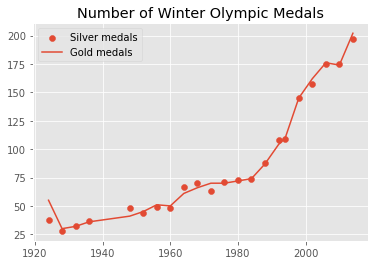

In [291]:
plt.scatter(silver_medals.column('Year'),silver_medals['count'], label = "Silver medals")
plt.plot(gold_medals['Year'],gold_medals['count'], label = "Gold medals")
plt.title("Number of Winter Olympic Medals")
plt.legend()
plt.show()

In [285]:
France = athletes.where("Team","France").group("Year")

In [286]:
Swiss = athletes.where("Team","Switzerland").group("Year")

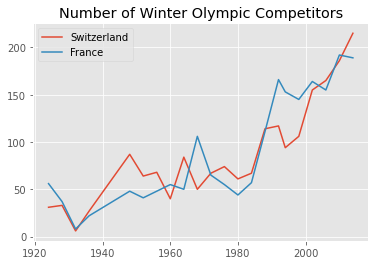

In [278]:
plt.plot(Swiss['Year'],Swiss['count'], label = "Switzerland")
plt.plot(France['Year'],France['count'], label = "France")
plt.title("Number of Winter Olympic Competitors")
plt.legend()
plt.show()

5. What are the top ten countries in number of Gold, silver, bronze medals, and total medals? You should have four sets of top ten countries for each of the scenarios. Generate the **five number summary** for each medal type for all countries.
Hint: `.where("Medal",are.not_equal_to("nan"))` to get only medal winners. Consider how to create a column for the sum of the three medal categories.

In [263]:
athletes.where("Medal",are.not_equal_to("nan")).pivot("Medal","Team").sort("Bronze", descending=True)

Team,Bronze,Gold,Silver
Finland,215,66,145
Sweden,177,125,126
Norway,127,151,165
United States,121,141,271
Austria,97,67,80
Canada,97,289,189
Switzerland,97,48,38
Soviet Union,81,228,81
Czechoslovakia,75,2,81
France,75,34,33


6. What are the top 5 sports in terms of number of athletes? Is this what you expected?

In [264]:
two_num_sum(athletes.where("Medal",are.not_equal_to("nan")).pivot("Medal","Team"),"Bronze")

mean: 24.49 
standard deviation: 41.52 



[24.493506493506494, 41.522212292681722]

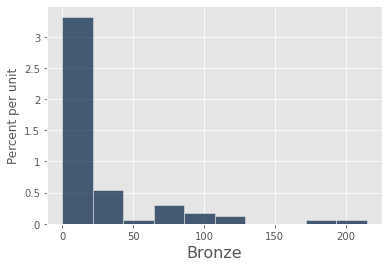

In [267]:
athletes.where("Medal",are.not_equal_to("nan")).pivot("Medal","Team").hist("Bronze")

7. Which sports (top 5) awarded the most medals in Lake Placid, New York (1980,
https://www.lakeplacid.com/do/activities/olympic-sites ).

**Challenge Question:** Does the host country team have an advantage? To get at this you may need to create another column in the athletes Table with the team name of the host country. Use a markdown cell to create a strategy to address this question. **This is the sort of research question that can emerge during your data exploration.**

In [208]:
athletes.group("City").show(20)

City,count
Albertville,3436
Calgary,2639
Chamonix,460
Cortina d'Ampezzo,1307
Garmisch-Partenkirchen,895
Grenoble,1891
Innsbruck,3639
Lake Placid,2098
Lillehammer,3160
Nagano,3605


In [255]:
host_country = np.array(['France','Canada','France','Italy','Germany','France', 'Austria', \
                         'United States','Norway','Japan','Norway','United States','Switzerland','Japan','Yugoslavia','Russia','United States', 'Italy', 'Canada'])

In [198]:
host_country

array(['France', 'Canada', 'France', 'Italy', 'Germany', 'France',
       'Austria', 'United States', 'Norway', 'Japan', 'Norway',
       'United States', 'Switzerland', 'Japan', 'Yugoslavia', 'Russia',
       'United States', 'Italy', 'Canada'],
      dtype='<U13')

In [243]:
host = Table().with_columns("City",\
       athletes.group("City").column('City'),"Country",host_country)
host

City,Country
Albertville,France
Calgary,Canada
Chamonix,France
Cortina d'Ampezzo,Italy
Garmisch-Partenkirchen,Germany
Grenoble,France
Innsbruck,Austria
Lake Placid,United States
Lillehammer,Norway
Nagano,Japan


In [244]:
athletes=athletes.join("City",host)

In [246]:
athletes=athletes.with_columns("Host",athletes['Team']==athletes['Country'])
athletes.select("Team","City","Country","Host")

Team,City,Country,Host
Netherlands,Albertville,France,False
Netherlands,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False
United States,Albertville,France,False


#### Number of athletes when host country (True)
Need intensive variable, Gold/athlete

In [203]:
athletes.pivot('Host','Team').sort('True',descending=True)

Team,False,True
United States,2752,569
Canada,2149,441
Japan,1705,351
Italy,1862,347
France,1639,328
Russia,1077,317
Norway,2080,248
Austria,1759,195
Switzerland,1791,120
Yugoslavia,418,103


In [253]:
team_host = athletes.where('Host',True).pivot('Medal','Team')
team_host = team_host.with_columns('Gold Medal per athlete', \
                   team_host['Gold']/(team_host['Gold']+team_host['Silver']+team_host['Bronze']+team_host['nan']))
team_host.sort('Gold',descending = True)

Team,Bronze,Gold,Silver,nan,Gold Medal per athlete
Canada,6,63,15,357,0.142857
United States,14,56,75,424,0.0984183
Russia,11,25,20,261,0.0788644
Norway,11,15,23,199,0.0604839
Italy,10,11,0,326,0.0317003
France,11,9,7,301,0.027439
Japan,5,9,2,335,0.025641
Austria,4,5,5,181,0.025641
Germany,0,2,3,46,0.0392157
Switzerland,31,2,3,84,0.0166667


In [257]:
team_nohost = athletes.where('Host',False).pivot('Medal','Team')
team_nohost = team_nohost.with_columns('Gold Medal per athlete', \
                   team_nohost['Gold']/(team_nohost['Gold']+team_nohost['Silver']+team_nohost['Bronze']+team_nohost['nan']))
team_nohost.sort('Gold',descending = True).show(20)

Team,Bronze,Gold,Silver,nan,Gold Medal per athlete
Soviet Union,81,228,81,561,0.239748
Canada,91,226,174,1658,0.105165
Norway,116,136,142,1686,0.0653846
Sweden,177,125,126,1803,0.0560287
Germany,68,113,111,1605,0.0595677
United States,107,85,196,2364,0.0308866
Finland,215,66,145,1483,0.0345731
Austria,93,62,75,1529,0.0352473
South Korea,10,50,26,674,0.0657895
Russia,60,47,53,917,0.0436397


In [ ]:
athletes = athletes.join('Team',medals_team_1)

In [ ]:
athletes = athletes.join('Team',athletes_team_1)

In [ ]:
athletes = athletes.with_column('Gold_athlete_N',athletes['Gold_2']/athletes['count_2']*athletes['Host']).sort('Gold_athlete',descending=True)
athletes.select('Gold_athlete_H')

In [ ]:
athletes.pivot('Host','Team','Gold_athlete_N',np.mean).sort('True',descending=True)

In [ ]:
Host_1.group("Team",np.mean).select("Team","Gold_athlete mean mean")

Looks like Host does have higher Gold, cleanup!

In [ ]:
Host_1=athletes.where('Host',True).group("Team", np.mean)
Host_1.to_csv("Host1.csv")
Host_1

In [ ]:
Host_0=athletes.where('Host',False).group("Team", np.mean)
Host_0.to_csv("Host0.csv")
Host_0.where("Team", "Canada")

In [ ]:
athletes

In [237]:
3 == 4

False

In [238]:
11 == 11

True

In [239]:
11 <= 12

True

Back to Olympics: need to see when a team is hosting

#### Time Trends

9. Plot the trend in number of athletes per year. What is the trend?
<br>Hint: `athletes.group("Year").plot("Year","count")`

10. Plot the number of medals per year. What is the trend? How does this trend compare to that of the medals?

11. Team sports award everyone the same medal. Plot the gold medal trend excluding “Ice Hockey”, why hockey?

12. Plot the yearly trend in number of sports. Think of a strategy to code this. What is the trend? 

In [258]:
athletes.group(["Year","Event"])

Year,Event,count
1924,Alpinism Mixed Alpinism,21
1924,Bobsleigh Men's Four/Five,39
1924,Cross Country Skiing Men's 18 kilometres,41
1924,Cross Country Skiing Men's 50 kilometres,33
1924,Curling Men's Curling,16
1924,Figure Skating Men's Singles,11
1924,Figure Skating Mixed Pairs,18
1924,Figure Skating Women's Singles,8
1924,Ice Hockey Men's Ice Hockey,82
1924,Military Ski Patrol Men's Military Ski Patrol,24


In [258]:
athletes.group(["Year","Event"])

Year,Event,count
1924,Alpinism Mixed Alpinism,21
1924,Bobsleigh Men's Four/Five,39
1924,Cross Country Skiing Men's 18 kilometres,41
1924,Cross Country Skiing Men's 50 kilometres,33
1924,Curling Men's Curling,16
1924,Figure Skating Men's Singles,11
1924,Figure Skating Mixed Pairs,18
1924,Figure Skating Women's Singles,8
1924,Ice Hockey Men's Ice Hockey,82
1924,Military Ski Patrol Men's Military Ski Patrol,24


In [182]:
athletes.group(["Year","Sport"])

Year,Sport,count
1924,Alpinism,21
1924,Bobsleigh,39
1924,Cross Country Skiing,74
1924,Curling,16
1924,Figure Skating,37
1924,Ice Hockey,82
1924,Military Ski Patrol,24
1924,Nordic Combined,30
1924,Ski Jumping,27
1924,Speed Skating,110


In [181]:
athletes.group(["Year","Sport"]).group('Year')

Year,count
1924,10
1928,8
1932,7
1936,8
1948,9
1952,8
1956,8
1960,8
1964,10
1968,10


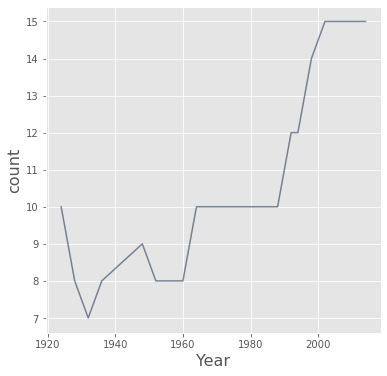

In [194]:
athletes.group(["Year","Sport"]).group('Year').plot("Year","count", alpha=0.5)

Text(0.5, 1.0, 'Number of Winter Olympic Sports')

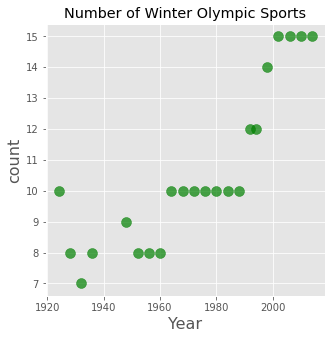

In [195]:
athletes.group(["Year","Sport"]).group('Year').scatter("Year","count", color='green', s=100)
plt.title("Number of Winter Olympic Sports")

13. Plot an overlay of gold, silver, and bronze medals as a function of year on the same plot excluding hockey. What is the trend? Are the medals awarded at a similar rate?

14. Compare the US and Norway medal counts as a function of year by overlaying their counts. Hint: You could create separate tables for the US and Norway using an appropriate .where method. Now these tables can be combined using the Table .append method which merges two tables for instance, `NORUSA = US.append(Norway)`. 

15. Now use a scatter plot (` .scatter()` ) to look at the number of athletes per year for the US versus that for Norway. What trends do you see?

#### Ideas for future exploration

Data sets are available in this folder for average annual temperature by country, country population, and the highest peak in each country. <br>Furthermore, global warming is exerting pressure on winter sports.  Insert a markdown cell to describe a question you could study <br>in the future (not as part of this mini project). For instance, which countries are likely to have medal winning athletes based on characteristics or the future of winter sports given climate change.

### <font color=blue> **Feedback** </font>

Please include a reflection. 
* How did this mini-project go? 
* Was it difficult to write code without a template?
* Did you seek help from any of the instructors or class assistants?
* Were there questions you found especially challenging you would like your instructor to review in class? 
* How long did the project take you to complete?
  
Share your feedback so we can continue to improve this class!

**Insert a markdown cell below this one and write your reflection on this lab.**

In [ ]:
print("Nice work ", name, user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)